# Gradient Descent Basics

You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target

**Instructions:**
- Calculate the predictions, preds, by multiplying weights by the input_data and computing their sum.
- Calculate the error, which is the difference between target and preds. Notice that this error corresponds to y-xb in the gradient expression.
- Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of input_data and error and multiply that by 2.

In [2]:
import numpy as np
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)


[14 28 42]


# Improving Model Weights

Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

**Instructions:**
- Set the learning rate to be 0.01 and calculate the error from the original predictions. This has been done for you.
- Calculate the updated weights by subtracting the product of learning_rate and slope from weights.
- Calculate the updated predictions by multiplying weights_updated with input_data and computing their sum.
- Calculate the error for the new predictions. Store the result as error_updated.
- Hit 'Submit Answer' to compare the updated error to the original!

In [3]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


# Making multiple updates to weights

You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

**Instructions**
- Using a for loop to iteratively update weights:
- Calculate the slope using the get_slope() function.
- Update the weights using a learning rate of 0.01.
- Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
- Append mse to mse_hist.
- Hit 'Submit Answer' to visualize mse_hist. What trend do you notice?


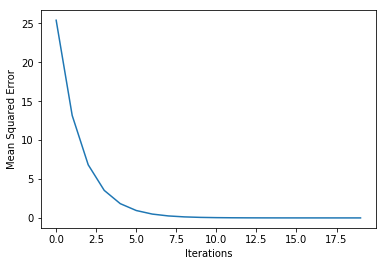

In [4]:
import matplotlib.pyplot as plt

#define get_slope, get_mse, get_error functions:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - slope * 0.01
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

Instructions
- Store the number of columns in the predictors data to n_cols. This has been done for you.
- Start by creating a Sequential model called model.
- Use the .add() method on model to add a Dense layer.
  - Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another Dense layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.

# NO DATA SET FOR NEXT PART... BUT THE CODE IS USEFUL!

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))
